In [4]:
import os 

In [5]:
baseline = ['AAPL', 'AMGN', 'CSCO', 'HON', 'INTC', 'MSFT', 'WBA']

In [6]:
indexfunds = ['DIA', 'ONEQ', 'QQQ', 'SPY']

In [7]:
%%bash 
ls data/csv/*.csv | head -n 3

data/csv/A_1514815200_1709586000_1d.csv
data/csv/AAL_1514815200_1709586000_1d.csv
data/csv/AAPL_1514815200_1709586000_1d.csv


In [8]:
stockdata = [f'data/csv/{i}_1514815200_1709586000_1d.csv' for i in baseline]

In [9]:
indexdata = [f'data/csv/{i}_1514815200_1709586000_1d.csv' for i in indexfunds]

In [10]:
stockdata

['data/csv/AAPL_1514815200_1709586000_1d.csv',
 'data/csv/AMGN_1514815200_1709586000_1d.csv',
 'data/csv/CSCO_1514815200_1709586000_1d.csv',
 'data/csv/HON_1514815200_1709586000_1d.csv',
 'data/csv/INTC_1514815200_1709586000_1d.csv',
 'data/csv/MSFT_1514815200_1709586000_1d.csv',
 'data/csv/WBA_1514815200_1709586000_1d.csv']

In [11]:
indexdata

['data/csv/DIA_1514815200_1709586000_1d.csv',
 'data/csv/ONEQ_1514815200_1709586000_1d.csv',
 'data/csv/QQQ_1514815200_1709586000_1d.csv',
 'data/csv/SPY_1514815200_1709586000_1d.csv']

In [12]:
import plotly.graph_objects as go
import pandas as pd

In [13]:
labels = pd.read_csv("data/stocks.csv",usecols=['name','symbol'])

In [14]:
stocks = pd.read_csv("data/stocks.csv")

In [15]:
df = pd.read_csv(stockdata[0])

In [16]:
df.head()

Symbol     Period1     Period2 Interval        Date       Open       High  \
0   AAPL  1514815200  1709586000       1d  2018-01-02  42.540001  43.075001   
1   AAPL  1514815200  1709586000       1d  2018-01-03  43.132500  43.637501   
2   AAPL  1514815200  1709586000       1d  2018-01-04  43.134998  43.367500   
3   AAPL  1514815200  1709586000       1d  2018-01-05  43.360001  43.842499   
4   AAPL  1514815200  1709586000       1d  2018-01-08  43.587502  43.902500   

         Low      Close     Volume  
0  42.314999  43.064999  40.670979  
1  42.990002  43.057499  40.663891  
2  43.020000  43.257500  40.852787  
3  43.262501  43.750000  41.317898  
4  43.482498  43.587502  41.164425

In [17]:
# Candlestick Views 

In [18]:
def create_candlestick(df, title=None):
    data=[go.Candlestick(
    x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'])]

    if not title:
        title = df['Symbol'][0]

    fig = go.Figure(data=data,layout={'title':title})
    return fig

In [19]:
### Viewing Index Funds 

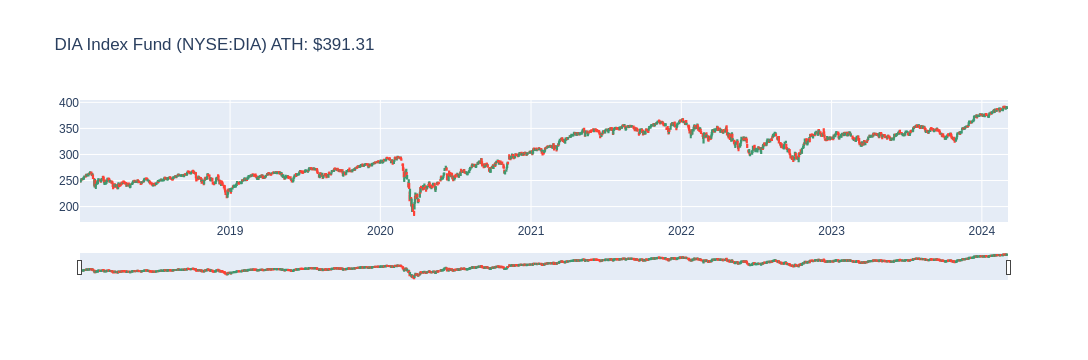

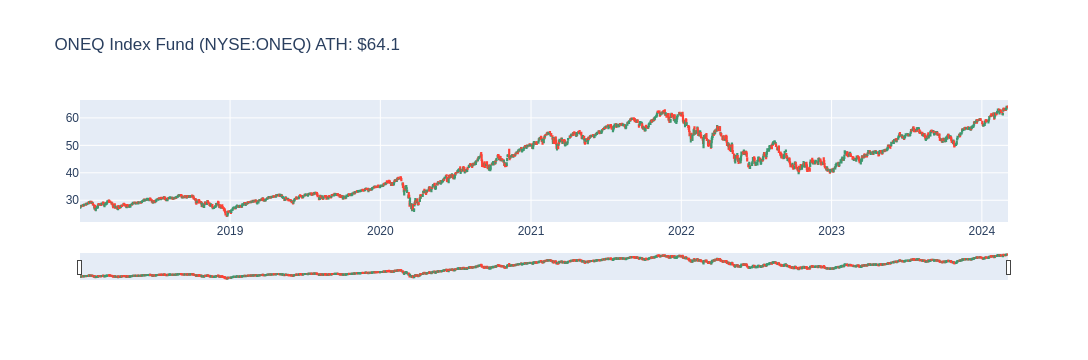

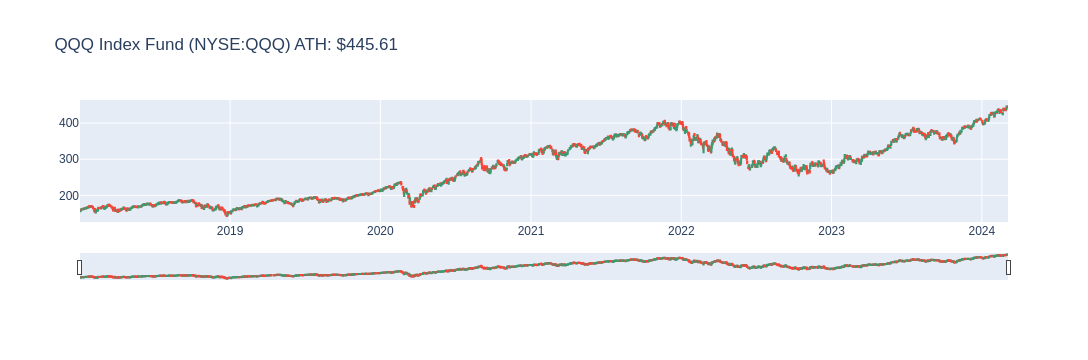

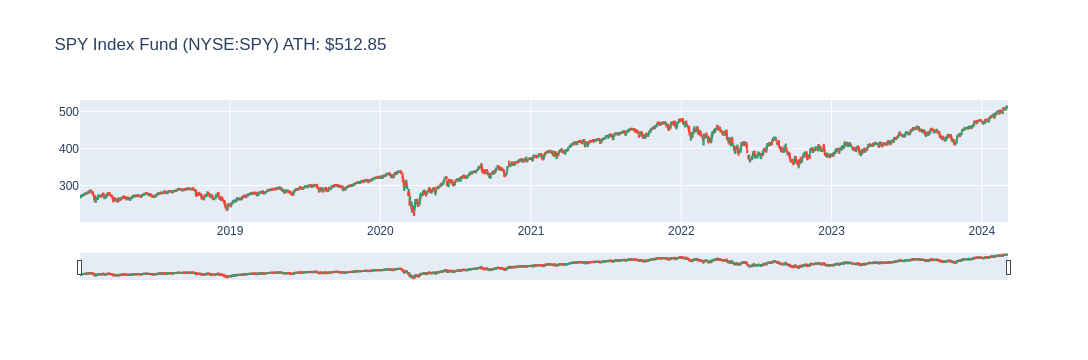

In [20]:
for stockFile in indexdata:
    df = pd.read_csv(stockFile)

    symbol = df['Symbol'].iloc[0]
    maxValue = round(df['Close'].max(numeric_only=True),2)
    title = f'{symbol} Index Fund (NYSE:{symbol}) ATH: ${maxValue}'
    
    fig = create_candlestick(df, title=title)
    fig.show()

### Viewing Securities 

ATH == All-Time-High

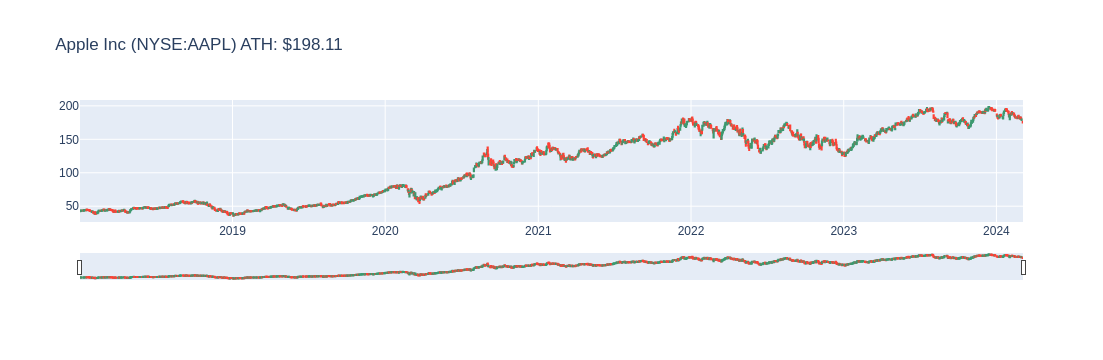

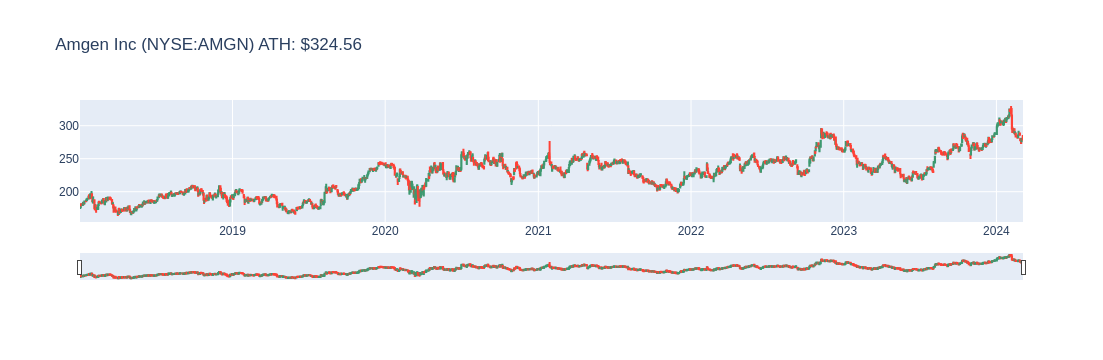

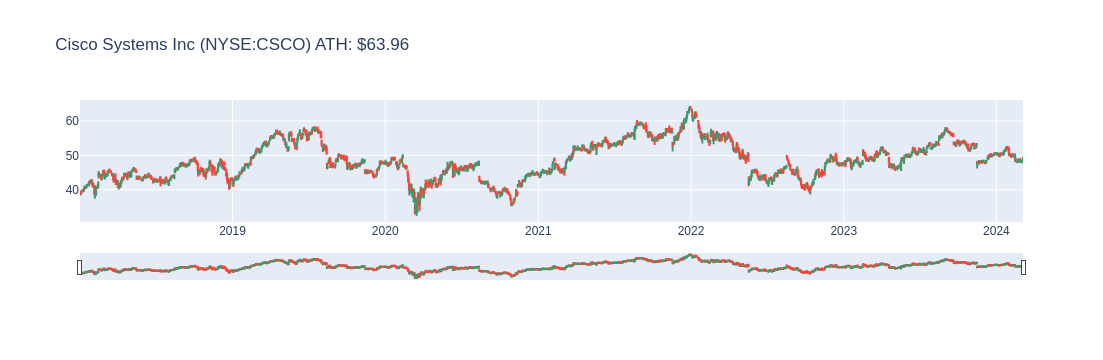

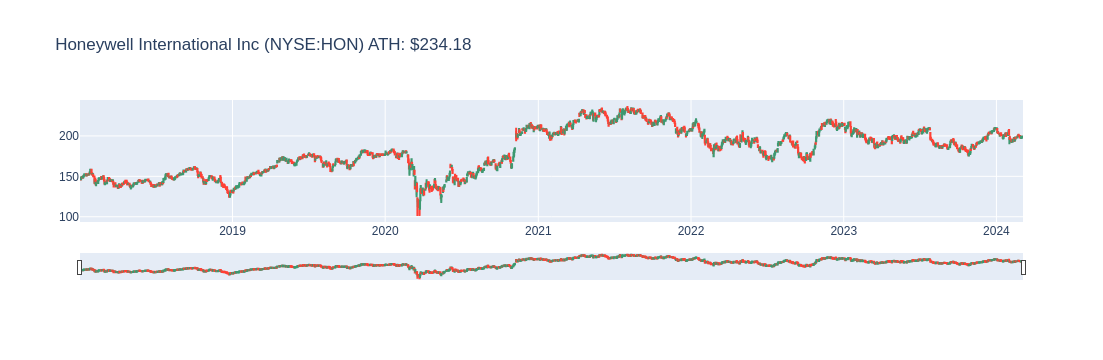

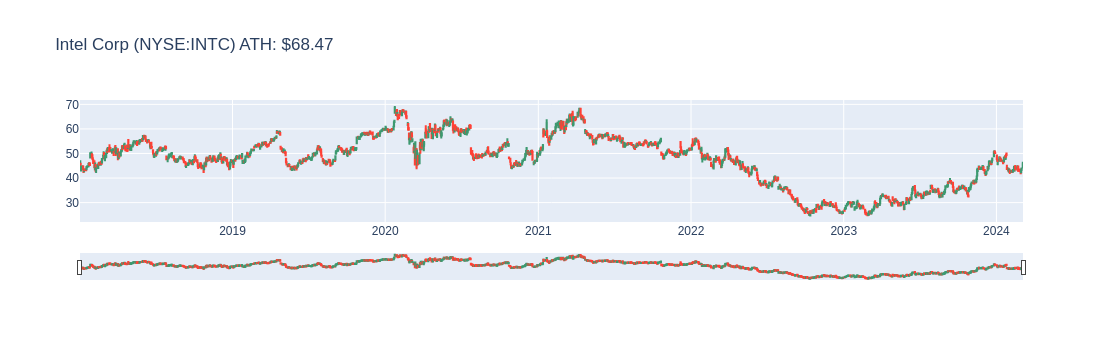

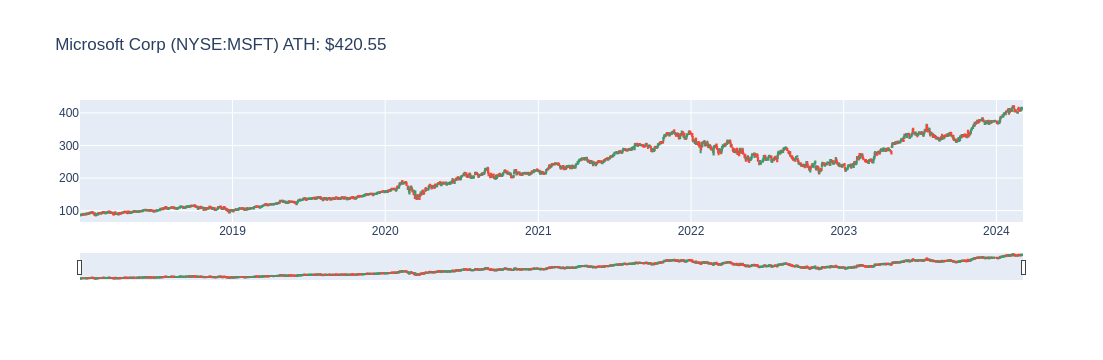

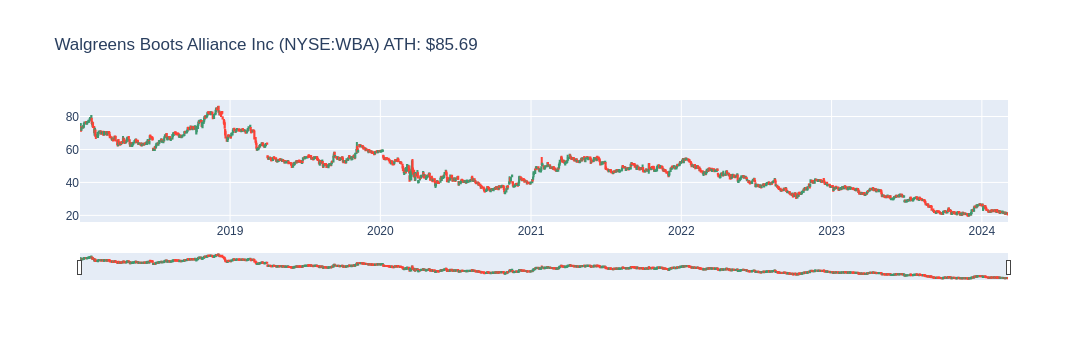

In [21]:
for stockFile in stockdata:
    df = pd.read_csv(stockFile)

    symbol = df['Symbol'].iloc[0]
    companyName = labels.loc[labels['symbol'] == symbol, 'name'].iloc[0]
    maxValue = round(df['Close'].max(numeric_only=True),2)

    title = f'{companyName} (NYSE:{symbol}) ATH: ${maxValue}'
    
    fig = create_candlestick(df, title=title)
    fig.show()

In [22]:
# Changes in All-Time-High 

In [23]:
def calculate_percentage_change(dataset):
    symbol = dataset['Symbol'].iloc[0]
    start = dataset['Date'].min()
    end = dataset['Date'].max()
    
    allTimeHigh = dataset['Close'].max()
    currentPrice = dataset.loc[dataset['Date']==end, 'Close'].iloc[0]
    percentageChange = ((currentPrice - allTimeHigh) / allTimeHigh) * 100
    
    days = len(dataset['Date'])
    record = dict(symbol=symbol,start=start, end=end, days=days, latestPrice=currentPrice, ath=allTimeHigh, change=percentageChange)
    return record

In [24]:
def get_percentage_changes(files=[]):
    records = []
    for file in files:
        try:
            df = pd.read_csv(file)
            record = calculate_percentage_change(df)
            records.append(record)
        except Exception as err:
            print(f'error={err}, filename={file}')
    return records

In [25]:
records = get_percentage_changes(files=indexdata)
indexFundChanges = pd.DataFrame(records)

In [26]:
indexFundChanges.sort_values(by='change', ascending=False)

symbol       start         end  days  latestPrice         ath    change
3    SPY  2018-01-02  2024-03-04  1552   512.299988  512.849976 -0.107241
0    DIA  2018-01-02  2024-03-04  1552   390.230011  391.309998 -0.275993
1   ONEQ  2018-01-02  2024-03-04  1552    63.919998   64.099998 -0.280811
2    QQQ  2018-01-02  2024-03-04  1552   444.019989  445.609985 -0.356813

In [27]:
files = [f'data/csv/{i}' for i in os.listdir('data/csv')]

In [28]:
records = get_percentage_changes(files=files)
df = pd.DataFrame(records)

error=single positional indexer is out-of-bounds, filename=data/csv/BRK.B_1514815200_1709586000_1d.csv
error=single positional indexer is out-of-bounds, filename=data/csv/BF.B_1514815200_1709586000_1d.csv


In [29]:
# All-Time-High Change

In [30]:
topSymbols = []
for category in stocks['category'].unique().tolist():
    sorted = stocks.loc[stocks['category'] == category,['name','symbol','percentage']].sort_values(by='percentage',ascending=False)
    symbols = sorted['symbol'].tolist()[:30]
    topSymbols.extend(symbols)

In [31]:
values = df.sort_values(by='change',ascending=False)[~df['symbol'].isin(indexfunds)]

/tmp/ipykernel_11075/2137059864.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [32]:
len(values)

517

In [33]:
values[values['symbol'].isin(baseline)]

symbol       start         end  days  latestPrice         ath     change
225   MSFT  2018-01-02  2024-03-04  1552   414.920013  420.549988  -1.338717
262   AAPL  2018-01-02  2024-03-04  1552   175.100006  198.110001 -11.614757
290   AMGN  2018-01-02  2024-03-04  1552   279.390015  324.559998 -13.917298
359    HON  2018-01-02  2024-03-04  1552   199.240005  234.179993 -14.920142
466   CSCO  2018-01-02  2024-03-04  1552    49.130001   63.959999 -23.186364
133   INTC  2018-01-02  2024-03-04  1552    45.610001   68.470001 -33.386884
146    WBA  2018-01-02  2024-03-04  1552    20.580000   85.690002 -75.983196

In [34]:
#recentATH = values.loc[(values['change']==0.0),['symbol','start','end','ath','latestPrice','change']]

In [35]:
#recentATH = values.loc[(values['change']>-1.0),['symbol','start','end','ath','latestPrice','change']]

In [36]:
#recentATHSymbols = recentATH['symbol'].tolist()

In [37]:
#baseline.extend(recentATHSymbols)

In [38]:
baseline.extend(topSymbols)

In [39]:
len(set(baseline))

60

In [40]:
picks = values[values['symbol'].isin(list(set(baseline)))]

In [41]:
picks.to_csv('data/portfolio.csv',index=False)

In [42]:
check = pd.merge(stocks, picks, on='symbol', how='outer').dropna(axis=0)

In [43]:
check.head()

index                             name symbol  percentage category  \
0      1           Unitedhealth Group Inc    UNH    8.902782      DIA   
1     13  Unitedhealth Group Incorporated    UNH    1.150000      SPY   
2      2                   Microsoft Corp   MSFT    6.882032      DIA   
3      1                   Microsoft Corp   MSFT    8.841000      QQQ   
4      1                   Microsoft Corp   MSFT    7.130000      SPY   

        start         end    days  latestPrice         ath     change  
0  2018-01-02  2024-03-04  1552.0   481.869995  555.150024 -13.200041  
1  2018-01-02  2024-03-04  1552.0   481.869995  555.150024 -13.200041  
2  2018-01-02  2024-03-04  1552.0   414.920013  420.549988  -1.338717  
3  2018-01-02  2024-03-04  1552.0   414.920013  420.549988  -1.338717  
4  2018-01-02  2024-03-04  1552.0   414.920013  420.549988  -1.338717

In [44]:
check.groupby('category')['percentage'].sum()

category
DIA     99.972878
ONEQ    72.675000
QQQ     72.675000
SPY     56.460000
Name: percentage, dtype: float64